In [6]:

from datetime import datetime
import backtrader as bt
class SmaCross(bt.Strategy): # bt.Strategy를 상속한 class로 생성해야 함.
    
    params = dict(
    pfast=5, # period for the fast moving average
    pslow=30 # period for the slow moving average
    )
    
    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast) # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow) # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2) # crossover signal
        
    def next(self):
        if not self.position: # not in the market
            if self.crossover > 0: # if fast crosses slow to the upside
                close = self.data.close[0] # 종가 값
                size = int(self.broker.getcash() / close) # 최대 구매 가능 개수
                self.buy(size=size) # 매수 size = 구매 개수 설정
        elif self.crossover < 0: # in the market & cross to the downside
            self.close() # 매도
        
cerebro = bt.Cerebro() # create a "Cerebro" engine instance
# 삼성전자의 '005930.KS' 코드를 적용하여 데이터 획득
data = bt.feeds.YahooFinanceData(dataname='003490.KS',
                    fromdate=datetime(2000, 1, 1),
                    todate=datetime(2020, 2, 20))

cerebro.adddata(data)
cerebro.broker.setcash(1000000) # 초기 자본 설정
cerebro.broker.setcommission(commission=0.00015) # 매매 수수료는 0.015% 설정
cerebro.addstrategy(SmaCross) # 자신만의 매매 전략 추가
cerebro.run() # 백테스팅 시작




<IPython.core.display.Javascript object>


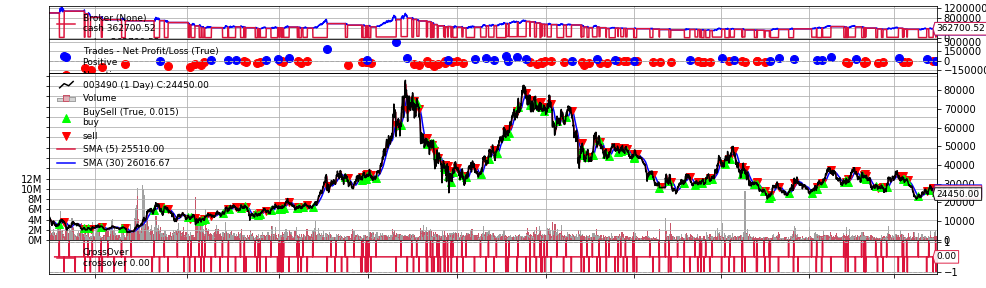

[[<Figure size 432x288 with 5 Axes>]]

In [7]:
%matplotlib inline
cerebro.plot() # 그래프로 보여주기

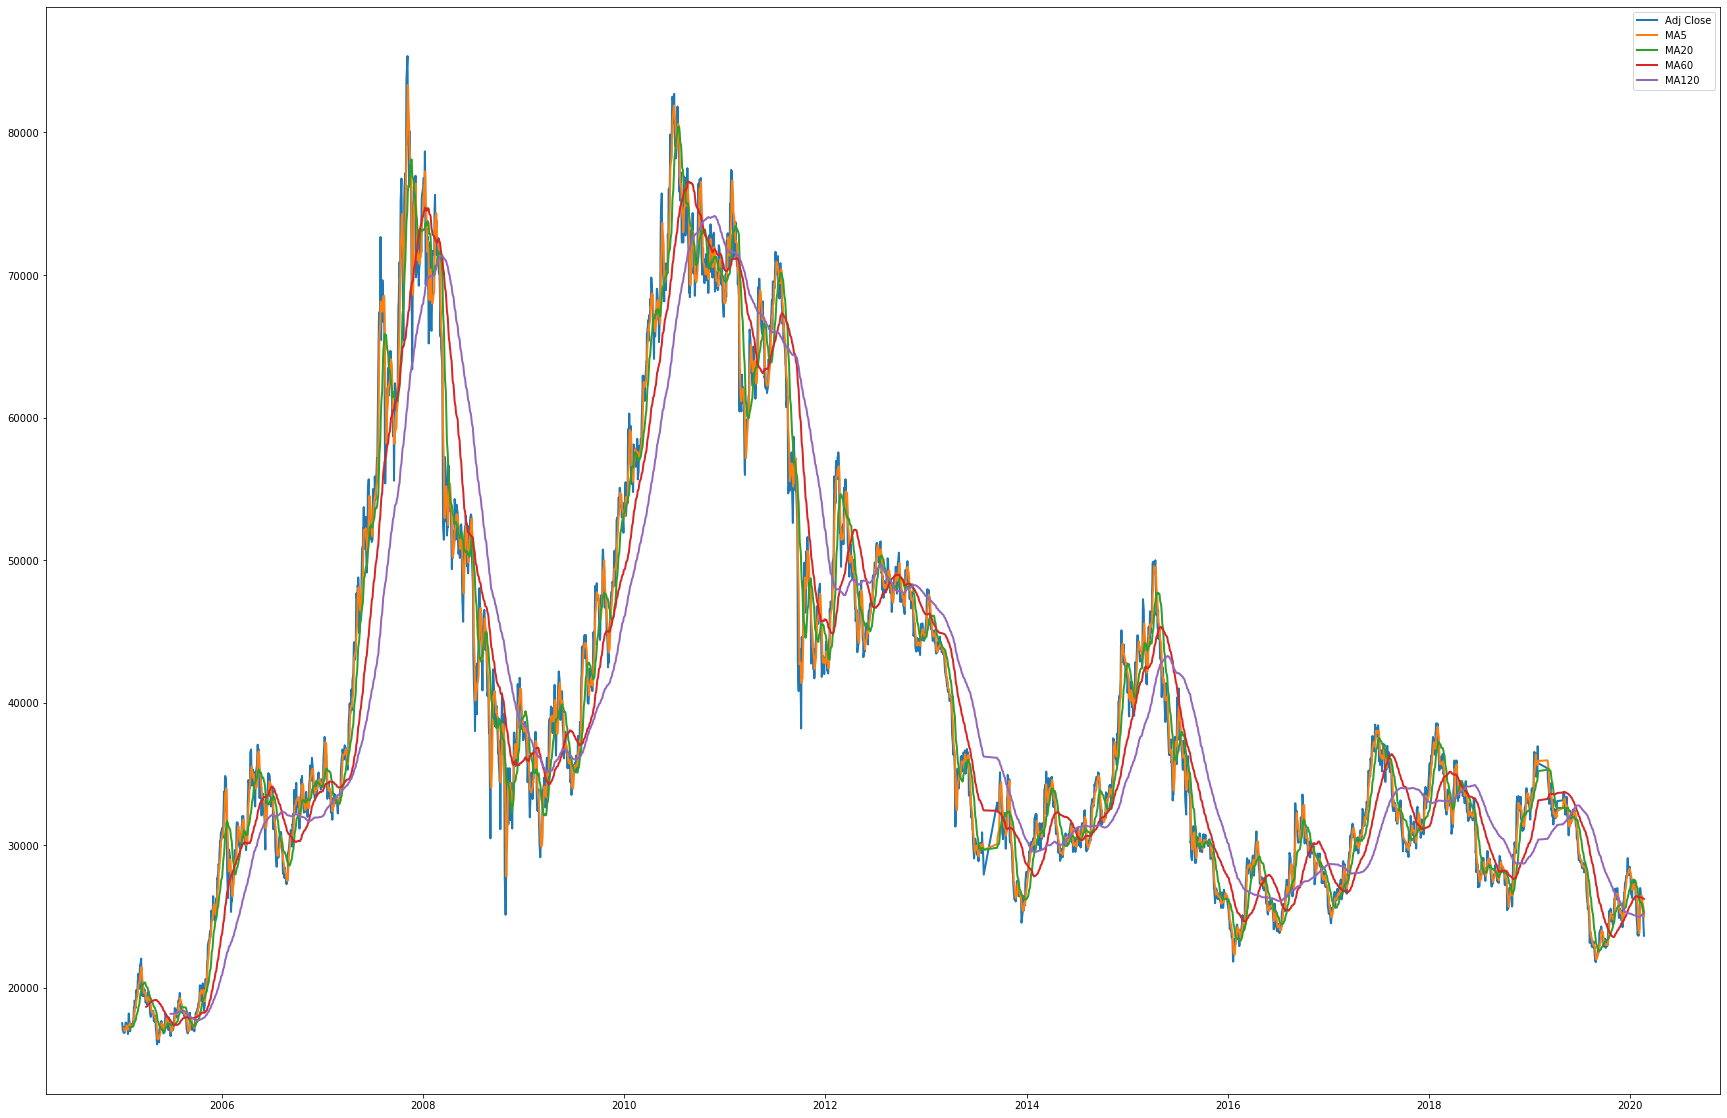

In [29]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,20))

# Get GS Data from Yahoo
gs = web.DataReader("003490.KS", "yahoo", "2005-01-01", "2020-02-21")
new_gs = gs[gs['Volume']!=0]

# Moving average
ma5 = new_gs['Adj Close'].rolling(window=5).mean()
ma20 = new_gs['Adj Close'].rolling(window=20).mean()
ma60 = new_gs['Adj Close'].rolling(window=60).mean()
ma120 = new_gs['Adj Close'].rolling(window=120).mean()

# Insert columns
new_gs.insert(len(new_gs.columns), "MA5", ma5)
new_gs.insert(len(new_gs.columns), "MA20", ma20)
new_gs.insert(len(new_gs.columns), "MA60", ma60)
new_gs.insert(len(new_gs.columns), "MA120", ma120)

# Plot
plt.plot(new_gs.index, new_gs['Adj Close'], label='Adj Close')
plt.plot(new_gs.index, new_gs['MA5'], label='MA5')
plt.plot(new_gs.index, new_gs['MA20'], label='MA20')
plt.plot(new_gs.index, new_gs['MA60'], label='MA60')
plt.plot(new_gs.index, new_gs['MA120'], label='MA120')




plt.legend(loc="best")
plt.grid()


plt.show()